# Experimentos computacionais para induzir propriedades da regressão linear

A reiteração de dúvidas quanto a propriedades de um modelo de regressão linear em diversos cenários imaginados pelos alunos mostra que a abordagem de simplesmente responder a perguntas principalmente por meio de intuição dos conceitos matemáticos pode ser insuficiente.

## Meta-conhecimento

Procuraremos construir experimentos computacionais genéricos que exemplifiquem uma situação com incerteza quanto às propriedades dos modelos, que possam ilustrar (e não demonstrar) uma possível resposta.

Concretamente, sobre modelização por regressão linear, procuraremos descobrir/ilustrar propriedades das relações entre variáveis. Para isso, construiremos dados sintéticos (utilizando geradores prontos para isso) e criaremos uma variável target com alguma propriedade interessante a ser testada!

Sugestões de primeiros experimentos:

1. Com target gerado por combinação linear de variáveis independentes: 
    
    a. conseguimos recuperar exatamente os coeficientes da regressão idênticos aos pesos da combinação linear? Avaliar R2
	
    b. variantes: 
        - adicionando uma variável linearmente dependente das variáveis anteriores
        - com duas variáveis imperfeitamente correlacionadas
        - adicionando ruído no target
        - excluindo uma ou várias variáveis condicionantes do dataset para treinamento

2. Com target gerado por combinação linear, como item anterior, mas adicionando um componente do target como produto de duas variáveis independentes:
    
    a. repetir análise: coeficientes, resíduos

3. Efeitos do tamanho relativo entre número de linhas e número de colunas do dataset. Os expertimentos anteriores foram provavelmente construídos com muito mais linhas do que colunas, mudaremos isso a seguir:

    a. analise resultados da modelização realizada sobre dataset com igual número de linhas e colunas

    b. sobre o dataset anterior descarte uma linha e compare o novo resultado com o anterior. Eventualmente, descarte múltiplas linhas e compare novamente.

Procurem redigir uma proposta da propriedade geral assim demonstrada.

Se conseguirem ilustrar experimentalmente uma propriedade particularmente interessante ou contra-intuitiva, compartilhem com o resto da turma!

Possíveis perguntas que poderiam suscitar novos experimentos:
- o que acontece na interpretação dos coeficientes se uma das variáveis tem um range de valores muito maior? Por exemplo, multiplicar a variável c0 por 1000
- sugiro testar diretamente a função de geração de regressão do sklearn, utilizando seus parâmetros de ruído (noise), n_informative, effective_rank (para simular correlações entre as variáveis), etc.
- traga suas dúvidas e sugestões de experimentos...


Já temos um caderno com experimentos computacionais para as propriedades de sobreajustamento (overfit) que será apresentado posteriormente.

Mas o método de experimentação computacional é extremamente genérico e deveria fazer parte do ferramental básico de todo cientista de dados.

Procuraremos desenvolver uma adaptação para árvores de decisão! Utilizando regras lógicas para construir o target!

Outro benefício do uso mais sistemático de dados sintéticos é de contornar as restrições de uso de dados reais, por questões de sigilo ou privacidade. Desde que os dados sintéticos reflitam as mesmas propriedades estatísticas dos dados reais, eles podem substituir o real, serem livremente publicados e utilizados em modelagem. Em tese, deveriam gerar os mesmos resultados... A ser testado! ;-)


Referências:
- geradores de dados sintéticos do sklearn: https://scikit-learn.org/stable/datasets/sample_generators.html
- geradores de dados sintéticos: https://towardsdatascience.com/synthetic-data-generation-a-must-have-skill-for-new-data-scientists-915896c0c1ae
- dados sintéticos para preservar sigilo de dados originais: https://research.aimultiple.com/synthetic-data/

In [68]:
# construindo dados sintéticos (utilizando o gerador de dados do scikit-learn)
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

from sklearn.datasets import make_regression
import pandas as pd

In [69]:
N_SAMPLES = 1000
X, y = make_regression(n_samples=N_SAMPLES, n_features=5, random_state=42)
df = pd.DataFrame(X)
df.columns = [f'c{i}' for i in df.columns]
df

,c0,c1,c2,c3,c4
0,-1.039906,0.612774,-1.053416,-0.623769,1.914031
1,0.317453,-0.332860,-0.093387,-0.529332,-1.514470
2,0.538910,-1.037246,-0.190339,-0.875618,-1.382800
3,-1.776246,-0.080600,-0.833056,0.915390,-0.549540
4,-0.223466,-0.349317,-0.019420,-0.303180,0.799942
...,...,...,...,...,...
995,0.758929,0.281191,0.104201,-0.062593,-0.753965
996,0.027313,-0.047371,-1.582177,-0.940399,-0.560761
997,0.965397,1.236131,0.088658,0.197316,-0.617652
998,0.648710,-0.167118,0.146714,1.206509,-0.816936


In [70]:
# Com target gerado por combinação linear de variáveis independentes:
# Fiquem livres para testar qualquer combinação linear, alterando os pesos
target = df['c0'] + 2*df['c1'] + 3*df['c2'] + 4*df['c3'] + 5*df['c4']

# Remapeando as variáveis
X = df
y = target

In [71]:
# a. conseguimos recuperar exatamente os coeficientes da regressão idênticos aos pesos da combinação linear? Avaliar R2

# importamos as funções necessárias da biblioteca scikit-learn:
# modelo de regressão linear
from sklearn.linear_model import LinearRegression

# separação treino-teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# instanciando o modelo de regressão linear
lr = LinearRegression()

# treinando o modelo
lr.fit(X_train, y_train)

LinearRegression()

In [72]:
# Qual o desempenho esperado e porque?
# avaliando o desempenho
lr.score(X_test, y_test)

1.0

In [73]:
# Inspecionando o modelo

# o que se espera que sejam os coeficientes?
# Visualização dos coeficientes
pesos = pd.DataFrame({'Variável': X.columns, 'Coeficientes': lr.coef_})
pesos

,Variável,Coeficientes
0,c0,1.0
1,c1,2.0
2,c2,3.0
3,c3,4.0
4,c4,5.0


In [74]:
# Quanto deveria ser o intercepto?
lr.intercept_

# O que modificar na construção do target para controlar o intercepto?

8.326672684688674e-17

In [90]:
import random
import numpy as np

def teste1(intercept=0, peso_C0=1, porcentagem_ruido_train=0, add_ruido_Y=False, desvio_padrao_ruido_Y=1):
    return teste2(np.mean, intercept=intercept, peso_C0=peso_C0, porcentagem_ruido_train=porcentagem_ruido_train
                  , add_ruido_Y=add_ruido_Y, desvio_padrao_ruido_Y=desvio_padrao_ruido_Y)
    
def teste2(f_ruido_train, intercept=0, peso_C0=1, porcentagem_ruido_train=0, add_ruido_Y=False, desvio_padrao_ruido_Y=1):
    # Com target gerado por combinação linear de variáveis independentes:
    # Fiquem livres para testar qualquer combinação linear, alterando os pesos
    target = peso_C0*df['c0'] + 2*df['c1'] + 3*df['c2'] + 4*df['c3'] + 5*df['c4'] + intercept

    # Remapeando as variáveis
    X = df
    y = target
    
    if add_ruido_Y:
        ruido_Y = np.random.normal(0, desvio_padrao_ruido_Y, len(y))
        y = y + ruido_Y
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    n_ruido = int(porcentagem_ruido_train*len(X_train))
    print('num de ruídos no X_train: ' + str(n_ruido))

    for i in range(n_ruido):
        newX = pd.Series([random.random()*f_ruido_train(df['c0'])
                        ,random.random()*f_ruido_train(df['c1'])
                        ,random.random()*f_ruido_train(df['c2'])
                        ,random.random()*f_ruido_train(df['c3'])
                        ,random.random()*f_ruido_train(df['c4'])]
                         , index=X.columns)
        X_train = X_train.append(newX, ignore_index=True)
        y_train = y_train.append(pd.Series(random.random()*f_ruido_train(y_train)))
    
    # instanciando o modelo de regressão linear
    lr = LinearRegression()

    # treinando o modelo
    lr.fit(X_train, y_train)
    
    print('score:', lr.score(X_test, y_test))
    
    pesos = pd.DataFrame({'Variável': X.columns, 'Coeficientes': lr.coef_})
    print('pesos:\n',pesos)
    
    intercept = lr.intercept_
    print('intercept:', intercept)
    
teste1(add_ruido_Y=True, desvio_padrao_ruido_Y=5)

num de ruídos no X_train: 0
score: 0.6791829772571718
pesos:
   Variável  Coeficientes
0       c0      1.452248
1       c1      1.776813
2       c2      3.115225
3       c3      3.917769
4       c4      4.727845
intercept: 0.15215977797615213


In [84]:
teste1(add_ruido_Y=True)

num de ruídos no X_train: 0
score: 0.9803983074353427
pesos:
   Variável  Coeficientes
0       c0      1.090981
1       c1      1.983867
2       c2      2.931833
3       c3      4.007107
4       c4      4.959361
intercept: -0.0078558226131615


In [85]:
teste2(f_ruido_train=np.max, porcentagem_ruido_train=0.1)

num de ruídos no X_train: 80
score: 0.8828842076149664
pesos:
   Variável  Coeficientes
0       c0      0.214028
1       c1      1.058258
2       c2      2.172525
3       c3      2.673239
4       c4      3.509337
intercept: -0.4930843171830712


In [88]:
teste2(f_ruido_train=np.max, porcentagem_ruido_train=0.2)

num de ruídos no X_train: 160
score: 0.8183926732006948
pesos:
   Variável  Coeficientes
0       c0     -0.070502
1       c1      0.945410
2       c2      1.896374
3       c3      2.461814
4       c4      3.069562
intercept: -0.6185588129227075


In [56]:
teste2(f_ruido = np.max, porcentagem_ruido_X=0.4)

num de ruídos no X_train: 32
score: 0.7732449516447119
pesos:
   Variável  Coeficientes
0       c0     -0.061074
1       c1      0.649311
2       c2      2.441707
3       c3      1.243285
4       c4      3.706360
intercept: -0.552114762848575


In [53]:
teste1(porcentagem_ruido_X=0.1)

num de ruídos no X_train: 8
score: 0.9999980707298816
pesos:
   Variável  Coeficientes
0       c0      0.999041
1       c1      1.999693
2       c2      2.999098
3       c3      4.000482
4       c4      4.999714
intercept: 0.012530163756105887


In [46]:
teste1(porcentagem_ruido_X=0.2)

num de ruídos no X_train: 16
score: 0.9999931279556895
pesos:
   Variável  Coeficientes
0       c0      0.998365
1       c1      1.998950
2       c2      2.997939
3       c3      4.000852
4       c4      4.999299
intercept: 0.023819026245005075


In [47]:
teste1(porcentagem_ruido_X=0.4)

num de ruídos no X_train: 32
score: 0.9999961673134147
pesos:
   Variável  Coeficientes
0       c0      0.998895
1       c1      1.998463
2       c2      2.998850
3       c3      4.000546
4       c4      4.998359
intercept: 0.01774414150674256


In [48]:
teste1(porcentagem_ruido_X=0.8)

num de ruídos no X_train: 64
score: 0.9999917168952419
pesos:
   Variável  Coeficientes
0       c0      0.997826
1       c1      1.997558
2       c2      2.997102
3       c3      4.000796
4       c4      4.997386
intercept: 0.025722141155244467


In [49]:
teste1(porcentagem_ruido_X=2)

num de ruídos no X_train: 160
score: 0.999974246302745
pesos:
   Variável  Coeficientes
0       c0      0.996842
1       c1      1.994165
2       c2      2.995177
3       c3      4.001145
4       c4      4.991540
intercept: 0.0443504164118924


In [29]:
teste1()

num de ruídos no X_train: 0
score: 1.0
pesos:
   Variável  Coeficientes
0       c0           1.0
1       c1           2.0
2       c2           3.0
3       c3           4.0
4       c4           5.0
intercept: 7.28583859910259e-17


In [16]:
teste1(intercept=10)

score: 1.0
pesos:
   Variável  Coeficientes
0       c0           1.0
1       c1           2.0
2       c2           3.0
3       c3           4.0
4       c4           5.0
intercept: 10.0


In [19]:
teste1(peso_C0=random.random())

score: 1.0
pesos:
   Variável  Coeficientes
0       c0      0.729518
1       c1      2.000000
2       c2      3.000000
3       c3      4.000000
4       c4      5.000000
intercept: 1.3183898417423734e-16


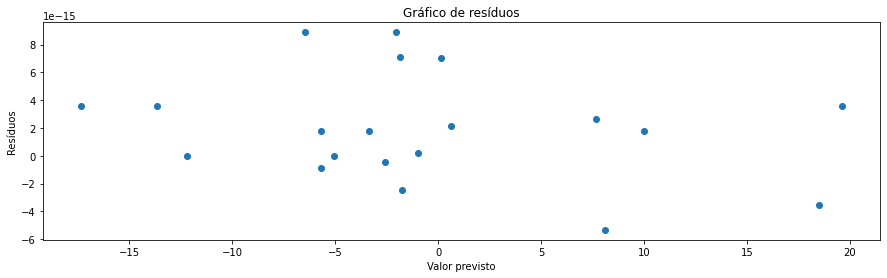

In [11]:
# Visando facilitar reuso para as próximas análises, 
# segue código de análise de resíduos
import matplotlib.pyplot as plt

y_pred = lr.predict(X_test)

plt.figure(figsize=(15,4))
plt.scatter(y_pred,y_test-y_pred)
plt.title("Gráfico de resíduos")
plt.xlabel("Valor previsto")
plt.ylabel("Resíduos")
plt.show()

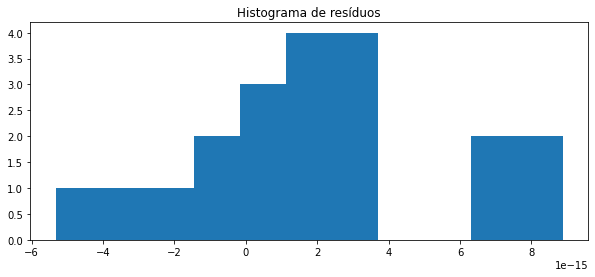

In [12]:
plt.figure(figsize=(10,4))
plt.hist(y_test-y_pred, bins= 11)
plt.title("Histograma de resíduos")
plt.show()

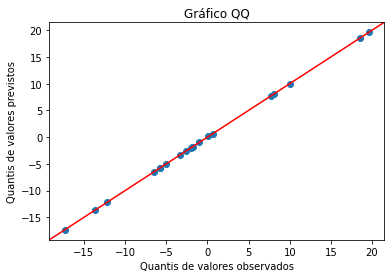

In [13]:
## Gráfico QQ
from statsmodels.graphics.gofplots import qqplot_2samples

qqplot_2samples(y_test,y_pred,line='45')
plt.title("Gráfico QQ")
plt.xlabel("Quantis de valores observados")
plt.ylabel("Quantis de valores previstos")
plt.show()

Sobre essa base, vamos agora construir as variantes sugeridas:
- adicionando uma variável linearmente dependente das variáveis anteriores
- com duas variáveis imperfeitamente correlacionadas (ruído na relação entre as variáveis)
- adicionando ruído no target (cf. numpy.random.normal ou outra distribuição)
- excluindo uma ou várias variáveis condicionantes do dataset para treinamento


In [ ]:
# adicionando uma variável linearmente dependente das variáveis anteriores
df['3df0_2df1'] = 3*df.c0 + 2*df.c1
df

,c0,c1,c2,c3,c4,3df0_2df1
0,-0.937825,0.515048,0.515035,3.852731,0.513786,-1.783380
1,1.088951,-0.715304,0.064280,0.679598,-1.077745,1.836244
2,-0.601707,-1.057711,1.852278,0.822545,-0.013497,-3.920542
3,0.821903,0.091761,0.087047,-1.987569,-0.299007,2.649229
4,1.549934,0.813517,-0.783253,-1.230864,-0.322062,6.276838
...,...,...,...,...,...,...
95,0.232050,-0.718444,-1.448084,-0.213447,-1.407464,-0.740739
96,-1.415371,-0.802277,-0.420645,-0.161286,-0.342715,-5.850667
97,0.404051,0.257550,1.886186,-0.074446,0.174578,1.727253
98,-0.926930,-1.024388,-0.059525,-0.252568,-3.241267,-4.829567


In [ ]:
# Agora, continue a análise como fizemos na aula anterior para esse caso de nova variável linearmente dependente